In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [21]:
# Read the dataset
df=pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')
df.shape, df.columns

((301, 9),
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
       dtype='object'))

In [22]:
#Filter Dataset and add column with Current year
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset['Current Year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [23]:
# Add new column with Age of vehicle
final_dataset['Age']=final_dataset['Current Year']- final_dataset['Year']

In [24]:
# Convert categorical columns with get_dummies
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

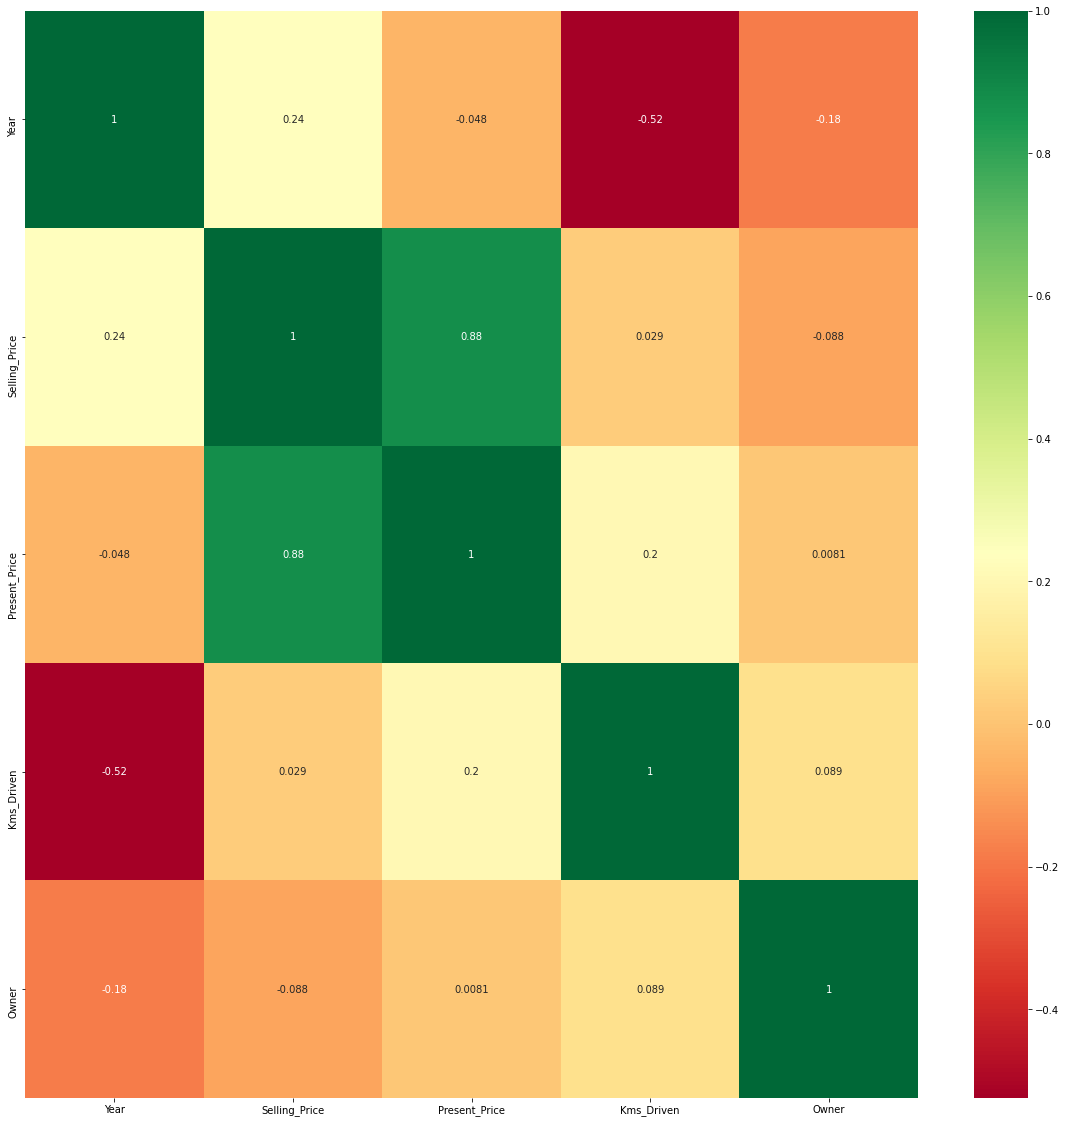

In [25]:
#get correlations of each features in dataset
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
# Set up x and y(target) data
y=final_dataset['Selling_Price']
x= final_dataset[['Present_Price', 'Kms_Driven', 'Owner', 'Age','Fuel_Type_Diesel', 
                 'Fuel_Type_Petrol', 'Seller_Type_Individual','Transmission_Manual']]

In [27]:
# Split the dataset with train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [28]:
#Define the model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [29]:
#Params to tune
'''
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split= [2,5,10,15,200]
min_samples_leaf= [1,2,5,10]
'''

"\nn_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]\nmax_features=['auto','sqrt']\nmax_depth=[int(x) for x in np.linspace(5,30,num=6)]\nmin_samples_split= [2,5,10,15,200]\nmin_samples_leaf= [1,2,5,10]\n"

In [30]:
# tune Params with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

params={
    'n_estimators' : [1200],
    'max_features' : ['auto'],
    'max_depth' : [10],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1]

}
grid_srch = GridSearchCV(estimator=model, param_grid=params,
                              cv=5, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, verbose=2)
grid_srch.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [1200]},
             scoring='neg_mean_squared_error', verbose=2)

In [31]:
# Find best params
grid_srch.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [32]:
# Fit the model with best params
rf = RandomForestRegressor(max_depth = 10,max_features = 'auto',min_samples_leaf = 1,
                           min_samples_split = 2,n_estimators = 1200)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=1200)

In [33]:
# make Predictions
predictions=rf.predict(X_test)

In [34]:
#Determine Accuracy
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 0.6085 degrees.
Accuracy = 88.21%.


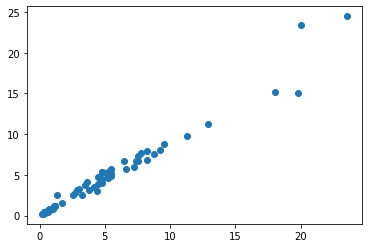

In [35]:
# Plot the predfictions
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,predictions)


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

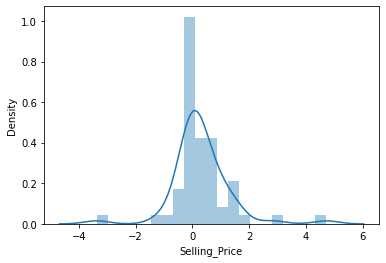

In [36]:
import seaborn as sns
sns.distplot(y_test-predictions)